In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
table = pd.read_csv("C:\\Users\\wills\\Desktop\\ML\\adult-modified.csv")
table

age workclass  education marital-status   race     sex  hours-per-week  \
0     39    Public         13         Single  White    Male              40   
1     50  Self-emp         13        Married  White    Male              13   
2     38   Private          9         Single  White    Male              40   
3     53   Private          7        Married  Black    Male              40   
4     28   Private         13        Married  Black  Female              40   
...   ..       ...        ...            ...    ...     ...             ...   
9995  38   Private         10        Married  White    Male              60   
9996  25   Private          9         Single  White  Female               8   
9997  21   Private         10         Single  Black    Male              40   
9998   ?   Private          2        Married  White    Male              53   
9999  39   Private         10         Single  White  Female              40   

     income  
0     <=50K  
1     <=50K  
2     <=50K  
3     <=50K  
4     <=50K  
...     ...  
9995   >50K  
9996  <=50K  
9997  <=50K  
9998  <=50K  
9999  <=50K  

[10000 rows x 8 columns]

## <h5> a) 1. Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean. </h5>

In [19]:
# replacing all missing values and values with ? with NaN
table = table.replace('?', np.nan)

table.rename(columns={'marital-status': 'maritalstatus', 'hours-per-week': 'hpw'}, inplace=True)

# remove rows where the categorical variable is none
table = table.drop(table[table.workclass.isnull()].index, axis=0)
table = table.drop(table[table.maritalstatus.isnull()].index, axis=0)
table = table.drop(table[table.race.isnull()].index, axis=0)
table = table.drop(table[table.sex.isnull()].index, axis=0)
table = table.drop(table[table.income.isnull()].index, axis=0)

#filling in empty numeric attributes with their attribute mean 
table['age'] = pd.to_numeric(table['age'])
age_mean = table.age.mean()
table.age.fillna(age_mean, axis=0, inplace=True)
education_mean = table.education.mean()
table.education.fillna(education_mean, axis=0, inplace=True)
hpw_mean = table.hpw.mean()
table.hpw.fillna(hpw_mean, axis=0, inplace=True)

table

age workclass  education maritalstatus   race     sex  hpw income
0     39.000000    Public         13        Single  White    Male   40  <=50K
1     50.000000  Self-emp         13       Married  White    Male   13  <=50K
2     38.000000   Private          9        Single  White    Male   40  <=50K
3     53.000000   Private          7       Married  Black    Male   40  <=50K
4     28.000000   Private         13       Married  Black  Female   40  <=50K
...         ...       ...        ...           ...    ...     ...  ...    ...
9995  38.000000   Private         10       Married  White    Male   60   >50K
9996  25.000000   Private          9        Single  White  Female    8  <=50K
9997  21.000000   Private         10        Single  Black    Male   40  <=50K
9998  38.364632   Private          2       Married  White    Male   53  <=50K
9999  39.000000   Private         10        Single  White  Female   40  <=50K

[9412 rows x 8 columns]

## <h5> a) 2. Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distributions of numeric attributes, bar graphs showing value counts for categorical attributes, etc. </h5>

In [54]:
table.describe()

age    education          hpw
count  9412.000000  9412.000000  9412.000000
mean     38.364632    10.125266    41.080217
std      12.962034     2.542118    11.884590
min      17.000000     1.000000     1.000000
25%      28.000000     9.000000    40.000000
50%      37.000000    10.000000    40.000000
75%      47.000000    13.000000    45.000000
max      90.000000    16.000000    99.000000

Private     6947
Public      1317
Self-emp    1148
Name: workclass, dtype: int64


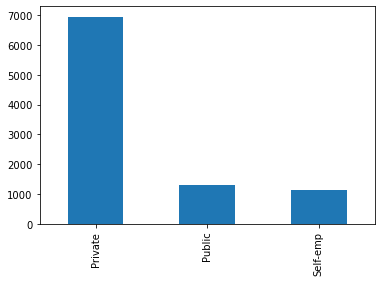

In [11]:
# Categorical attribute analysis
print(table['workclass'].value_counts())
table['workclass'].value_counts().plot.bar()

Married    4737
Single     4675
Name: maritalstatus, dtype: int64


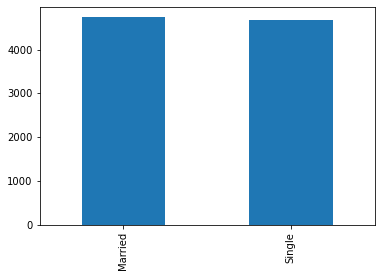

In [12]:
print(table['maritalstatus'].value_counts())
table['maritalstatus'].value_counts().plot.bar()

White          8062
Black           892
Asian           291
Amer-Indian      92
Hispanic         75
Name: race, dtype: int64


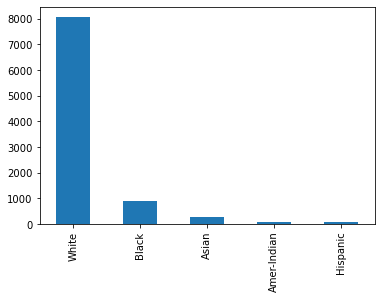

In [13]:
print(table['race'].value_counts())
table['race'].value_counts().plot.bar()

Male      6383
Female    3029
Name: sex, dtype: int64


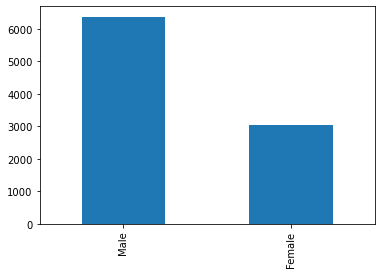

In [14]:
print(table['sex'].value_counts())
table['sex'].value_counts().plot.bar()

<=50K    7093
>50K     2319
Name: income, dtype: int64


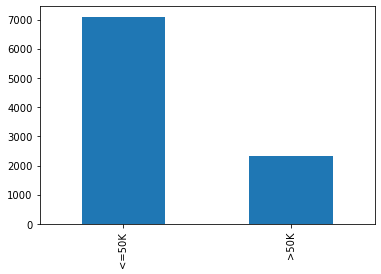

In [15]:
print(table['income'].value_counts())
table['income'].value_counts().plot.bar()

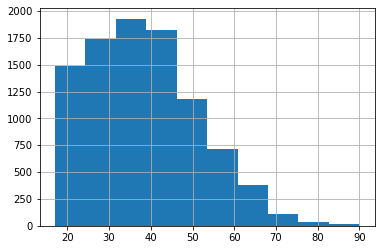

In [16]:
# histograms for numeric attributes
table.age.hist()

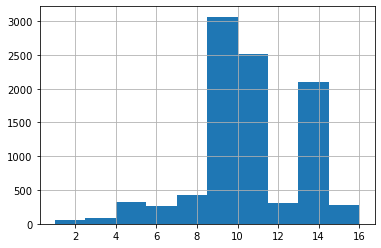

In [17]:
table.education.hist()

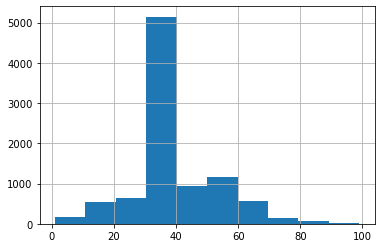

In [18]:
table.hpw.hist()

## <h5> From running the above analysis, we can see that this data set is slightly skewed towards white male entries. Additionaly, the majority of the people in this dataset work at private organizations and work there around 40 hours per week. There is a tendency in education to be around 10, with some getting higher education as evidenced by the 14. Lastly, the dataset is also right skewed in the age attribute, most people are between the ages of 20 and 50. </h5>

## <h5> a) 3. Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.</h5>

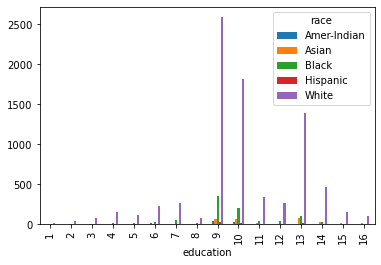

In [22]:
education_race = pd.crosstab(index=table["education"], columns=table["race"])
education_race.plot.bar()

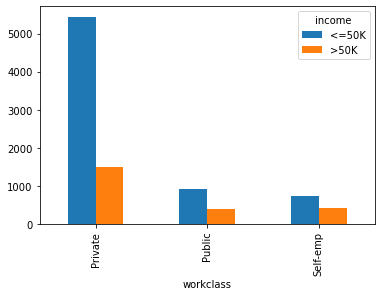

In [23]:
workclass_income = pd.crosstab(index=table["workclass"], columns=table["income"])
workclass_income.plot.bar()

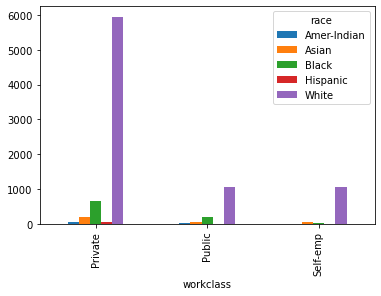

In [24]:
workclass_race = pd.crosstab(index=table["workclass"], columns=table["race"])
workclass_race.plot.bar()

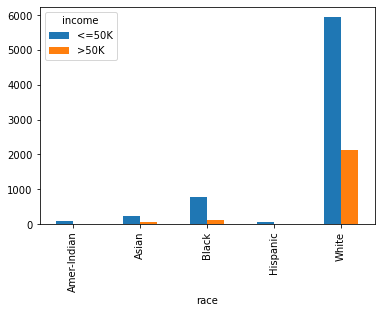

In [29]:
race_income = pd.crosstab(index=table["race"], columns=table["income"])
race_income.plot.bar()

In [35]:
race_income['percent'] = (race_income['<=50K'] / race_income['<=50K'].sum()) * 100
race_income

income       <=50K  >50K    percent
race                               
Amer-Indian     83     9   1.170168
Asian          224    67   3.158043
Black          773   119  10.898069
Hispanic        69     6   0.972790
White         5944  2118  83.800930

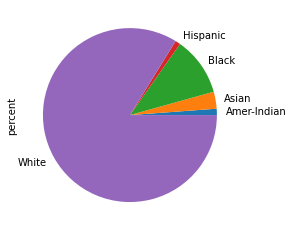

In [34]:
# percentages of low income instances by race

race_income.percent.plot.pie()

## <h5> The analysis here shows that white is the predominant race in most crosstabs, followed by black.We can see that most people who are white have higher education levels of over 9, and a large portion of the people who make over 50K (high income) work in the private sector. The race vs. income bar chart shows us clearly that a larger majority of black is in the low-income category. More people of race other than white work in the public sector when compared to the same race in the private sector, and when compared to the high difference in white people who work in the private sector (most) to those who work in the public sector (not as much, comparitively speaking). Lastly, the percentage of people who are in the low income bracket skews white, but there are a large percentage of non-white people considering the total people who are non-white vs. white. </h5> 

## <h5> a) 4. Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. </h5>

income     <=50K  >50K
education             
1             12     0
2             45     1
3             76     5
4            164    16
5            135     7
6            245    23
7            310    14
8             93     7
9           2539   526
10          1737   388
11           298    91
12           221    83
13           921   656
14           225   290
15            45   126
16            27    86


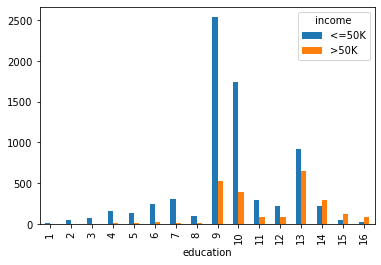

In [51]:
education_income = pd.crosstab(index=table["education"], columns=table["income"])
print(education_income)
education_income.plot.bar()

income  <=50K  >50K
hpw                
1           1     1
2           4     0
3           6     0
4           5     0
5           9     3
..        ...   ...
90          7     3
94          1     0
97          0     1
98          3     1
99          9     7

[83 rows x 2 columns]


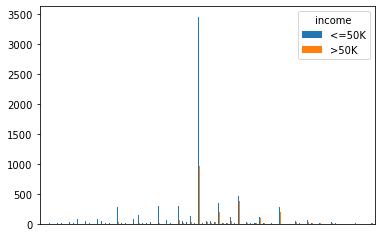

In [121]:
hpw_income = pd.crosstab(index=table["hpw"], columns=table["income"])
print(hpw_income)
hpw_income.plot.bar()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(True) 

income  <=50K  >50K
sex                
Female   2669   360
Male     4424  1959


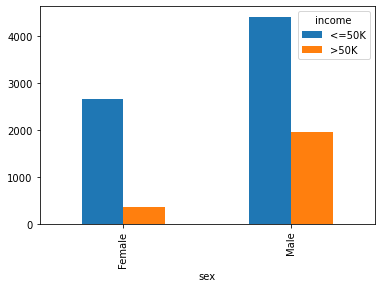

In [55]:
sex_income = pd.crosstab(index=table["sex"], columns=table["income"])
print(sex_income)
sex_income.plot.bar()

income         <=50K  >50K
maritalstatus             
Married         2730  2007
Single          4363   312


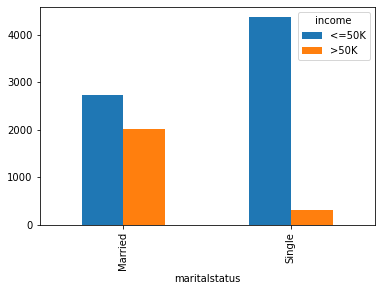

In [56]:
ms_income = pd.crosstab(index=table["maritalstatus"], columns=table["income"])
print(ms_income)
ms_income.plot.bar()

income  <=50K  >50K
age                
17.0       83     0
18.0      128     0
19.0      182     1
20.0      214     0
21.0      188     1
...       ...   ...
83.0        1     0
84.0        3     0
85.0        1     0
88.0        1     0
90.0       10     4

[72 rows x 2 columns]


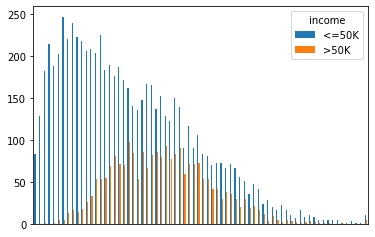

In [120]:
age_income = pd.crosstab(index=table["age"], columns=table["income"])
print(age_income)
age_income.plot.bar()
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(True) 

In [99]:
income_race = table.groupby(["race", "income"])["race"].value_counts()
high_income_perc_ai = income_race['Amer-Indian']['>50K'] / income_race['Amer-Indian'].sum()
high_income_perc_white = income_race['White']['>50K'] / income_race['White'].sum()
high_income_perc_black = income_race['Black']['>50K'] / income_race['Black'].sum()
high_income_perc_his = income_race['Hispanic']['>50K'] / income_race['Hispanic'].sum()
high_income_perc_asian = income_race['Asian']['>50K'] / income_race['Asian'].sum()

print(high_income_perc_ai, high_income_perc_white, high_income_perc_black, high_income_perc_his, high_income_perc_asian )

race
Amer-Indian    0.097826
Name: race, dtype: float64 race
White    0.262714
Name: race, dtype: float64 race
Black    0.133408
Name: race, dtype: float64 race
Hispanic    0.08
Name: race, dtype: float64 race
Asian    0.230241
Name: race, dtype: float64


## <h5> The above findings suggest that there are more whites who are in the high income bracket than other races comparatively, as a little over 25% of the white population is high income, as opposed to only 13% of the black population and 9% of the american-indian population. Asian is a close second at 23%. The other categories explored above show that age is directly related to income, namely that younger ages denotes low income (right-skew), and there is actually a normal distribution curve for high income and age, with the central tendency being around 40 years of age. Looking at the above bar charts, those who are married are much more likely to earn over 50K, compared to those who are single, and males are much more likely to earn over 50K than females. Working over 40 hours per week leads to higher income as well, and higher education lends itself to higher income. </h5>

## <h5> b) 1. Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop income_<=50K which is also created as a dummy variable in earlier steps). </h5>

In [132]:
table_dummies = pd.get_dummies(table, columns = ['workclass', 'maritalstatus', 'race', 'sex', 'income'])
target_label = table_dummies['income_>50K']
table_dummies = table_dummies.drop(labels=['income_<=50K', 'income_>50K'], axis=1)

from sklearn.model_selection import train_test_split
census_train, census_test, census_target_train, census_target_test = train_test_split(table_dummies, target_labels, test_size=0.2, random_state=33)

print (census_test.shape)
census_test[0:5]

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    0
9997    0
9998    0
9999    0
Name: income_>50K, Length: 9412, dtype: uint8
(1883, 15)


age  education  hpw  workclass_Private  workclass_Public  \
8419  56.0         10   45                  1                 0   
2629  54.0          9   45                  1                 0   
2523  52.0         11   35                  1                 0   
7143  42.0         16   60                  0                 0   
5902  30.0          9   50                  0                 0   

      workclass_Self-emp  maritalstatus_Married  maritalstatus_Single  \
8419                   0                      1                     0   
2629                   0                      1                     0   
2523                   0                      0                     1   
7143                   1                      1                     0   
5902                   1                      1                     0   

      race_Amer-Indian  race_Asian  race_Black  race_Hispanic  race_White  \
8419                 0           0           0              0           1   
2629                 0           0           0              0           1   
2523                 0           0           0              0           1   
7143                 0           0           0              0           1   
5902                 0           0           0              0           1   

      sex_Female  sex_Male  
8419           0         1  
2629           0         1  
2523           1         0  
7143           0         1  
5902           0         1

## <h5> b) 2. Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy. </h5>

In [140]:
from sklearn import tree, naive_bayes, discriminant_analysis, model_selection

In [138]:
# creating tree classifier
tree_classifier = tree.DecisionTreeClassifier(criterion='entropy')
tree_classifier.fit(census_train, census_target_train)

treepreds_test = tree_classifier.predict(census_test)
print(treepreds_test)

#creating Naive Bayes classifier
nb_classifier = naive_bayes.GaussianNB()
nb_classifier = nb_classifier.fit(census_train, census_target_train)
nbpreds_test = nb_classifier.predict(census_test)
print (nbpreds_test)

#creating LDA classifier
lda_classifier = discriminant_analysis.LinearDiscriminantAnalysis()
lda_classifier.fit(census_train, census_target_train)

ldapreds_test = lda_classifier.predict(census_test)
print(ldapreds_test)

['<=50K' '>50K' '<=50K' ... '<=50K' '<=50K' '>50K']
['>50K' '>50K' '<=50K' ... '>50K' '<=50K' '>50K']
['>50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']


In [146]:
cv_scores_tree = model_selection.cross_val_score(tree_classifier, table_dummies, target_label, cv=10)
cv_scores_nb = model_selection.cross_val_score(nb_classifier, table_dummies, target_label, cv=10)
cv_scores_lda = model_selection.cross_val_score(lda_classifier, table_dummies, target_label, cv=10)

print(cv_scores_tree)
print(cv_scores_nb)
print(cv_scores_lda)

import statistics
avg_acc_tree = statistics.mean(cv_scores_tree)
avg_acc_nb = statistics.mean(cv_scores_nb)
avg_acc_lda = statistics.mean(cv_scores_lda)

print(f"Avg. accuracy tree: {avg_acc_tree}, Avg. accuracy NB: {avg_acc_nb}, Avg. accuracy LDA: {avg_acc_lda}")

[0.76433121 0.75053079 0.77045696 0.76514346 0.76514346 0.75345377
 0.75876727 0.79277365 0.78214665 0.75664187]
[0.72823779 0.70488323 0.73113709 0.70669501 0.73219979 0.70563231
 0.7120085  0.7183847  0.73113709 0.7077577 ]
[0.81210191 0.80997877 0.79277365 0.81721573 0.80977683 0.78852285
 0.80021254 0.80765143 0.82146652 0.81615303]
Avg. accuracy tree: 0.7659389094584746, Avg. accuracy NB: 0.7178073197641756, Avg. accuracy LDA: 0.8075853261764713


## <h5> b) 3. For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf) or embed it in the Jupyter Notebook. </h5>

In [147]:
from sklearn.tree import export_graphviz
export_graphviz(tree_classifier,out_file='tree.dot', feature_names=census_train.columns)

In [155]:
system(dot -Tpng tree.dot -o dtree.png)

['dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.517066 to fit']

In [156]:
from IPython.display import Image
Image(filename='dtree.png', width=800)